# Working with Landsat Data in the Amazon Web Services (AWS) Cloud

This tutorial demonstrates how users access Landsat Data stored within the AWS Cloud environment using basic commands. Landsat data stored in the AWS Cloud is located within U.S. West (Oregon) us-west-2 region in a requester pays Simple Storage Services (S3) bucket. Users interested in utilizing direct access to Landsat data stored in S3 are encouraged to visit the Requester Pays Documentation Page (https://docs.aws.amazon.com/AmazonS3/latest/dev/RequesterPaysBuckets.html) for information concerning potential egress costs to accessing Landsat data with this method. 

<b>AWS Bucket Name:</b> usgs-landsat (Requester Pays) <br />
<b>AWS Region:</b> US West (Oregon) us-west-2<br />

An AWS account is required before undertaking this tutorial. Please see the AWS Account website to establish an account (https://aws.amazon.com/account/).  <br />


# Use Case Example
This tutorial uses AWS Command Line Interface (CLI) to demonstrate how to list and download Landsat objects within an S3 Bucket. Users can find additional information regarding AWS CLI via the AWS CLI documentation website (https://aws.amazon.com/cli/). This tutorial also uses commonly available Python Tools to draw a preview of a Landsat scene by reading the Landsat Data directly from S3.

# Topics Covered
1. [**Accessing Landsat Data without an AWS Account**](#noaccount) <br />
   1.1 This section demonstrates the response that users should expect to receive when trying to access the usgs-landsat S3 Bucket with AWS CLI without an AWS Account.  
   1.2 This section demonstrates the response that users should expect to receive when trying to access the usgs-landsat S3 Bucket using Python tools without an AWS Account.
2. [**Accessing Landsat Data with an AWS Account**](#account) <br/>
   2.1 This section demonstrates the response users should expect to receive when trying to access the usgs-landsat S3 Bucket with AWS CLI with an AWS Account.  <br/>
   2.2 This section demonstrates the response users should expect to receive when trying to access the usgs-landsat S3 Bucket using Python tools with an AWS Account.


# 1. Accessing Landsat Data without an AWS Account <a id="noaccount"></a>
Important: The usgs-landsat S3 bucket is a Requester Pays Bucket where the requester (users) may incur costs for accessing the data. If a requester pays acknowledgement is not properly passed with the request the AWS CLI command or python call will return a denial of service error. This section provides an example of the errors returned when the user has not properly included the requester pays acknowledgement within the AWS CLI or python request.

## 1.1 AWS Command Line Response when users to not have an AWS Account

### This command will list the contents within the AWS Bucket

In [ ]:
! aws s3 ls s3://usgs-landsat/collection02/

### This command will download an object in S3 to the user's local computer

In [ ]:
! aws s3api get-object --bucket usgs-landsat --key collection02/level-2/standard/oli-tirs/2020/026/027/LC08_L2SP_026027_20200827_20200906_02_T1/LC08_L2SP_026027_20200827_20200906_02_T1_MTL.txt LC08_L2SP_026027_20200827_20200906_02_T1_MTL.txt

## 1.2 Python Response when users do not have an AWS Account

### Import Packages 

In [ ]:
from matplotlib.pyplot import imshow
import rasterio as rio
%matplotlib inline

### Load Cloud Optimized GeoTIFF (COG) Band File from the S3 Bucket

In [ ]:
cog = 's3://usgs-landsat/collection02/level-2/standard/oli-tirs/2020/026/027/LC08_L2SP_026027_20200827_20200906_02_T1/LC08_L2SP_026027_20200827_20200906_02_T1_SR_B2.TIF'

### Read COG Band File from the S3 Bucket and Display It

In [ ]:
with rio.open(cog) as src:
    profile = src.profile
    arr = src.read(1)
imshow(arr)


### Important: This will produce an error message because we have not properly authenticated to with AWS to agree to the terms of the requester pays bucket. Before running the next section clear the kernel before continuing.

# 2. Accessing Landsat Data with an AWS Account<a id="account"></a>
Important: The usgs-landsat S3 bucket is a Requester Pays Bucket where the requester (user) may incur costs for accessing the data. This section demonstrates sample responses returned to the user’s computer when users have acknowledged requester pays (agreed to pay any incurred charges) for both AWS CLI commands and python requests.

## 2.1 AWS Command Line Response when the user has an AWS Account

### This command will list the contents within the AWS Bucket

In [ ]:
! aws s3 ls s3://usgs-landsat/collection02/level-2/standard/oli-tirs/2020/026/027/LC08_L2SP_026027_20200827_20200906_02_T1/ --request-payer requester

### This commnad will download an object in S3 to the user's local computer

In [ ]:
! aws s3api get-object --bucket usgs-landsat --key collection02/level-2/standard/oli-tirs/2020/026/027/LC08_L2SP_026027_20200827_20200906_02_T1/LC08_L2SP_026027_20200827_20200906_02_T1_MTL.txt  --request-payer requester LC08_L2SP_026027_20200827_20200906_02_T1_MTL.txt

## 2.2 Python Response when users have an AWS Account

### Import Packages

In [1]:
import boto3
from matplotlib.pyplot import imshow
import rasterio as rio
from rasterio.session import AWSSession

Fontconfig warning: ignoring UTF-8: not a valid region tag


### Setup AWS Requester Pays Environment

In [2]:
aws_session = AWSSession(boto3.Session(), requester_pays=True)

### Load Cloud Optimized GeoTIFF (COG) Band File from the S3 Bucket

In [8]:
import botocore.config
boto_config = botocore.config.Config(signature_version=botocore.UNSIGNED)


In [9]:
cog = 's3://usgs-landsat/collection02/level-2/standard/oli-tirs/2020/026/027/LC08_L2SP_026027_20200827_20200906_02_T1/LC08_L2SP_026027_20200827_20200906_02_T1_SR_B2.TIF'

### Read COG Band File from the S3 Bucket and Display It

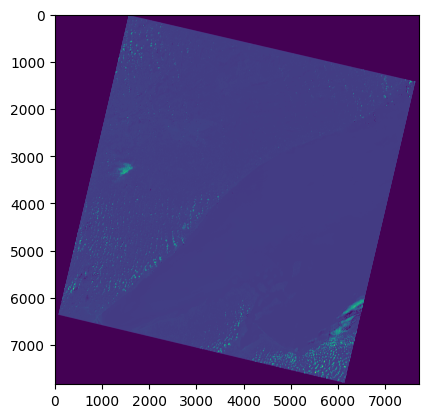

In [10]:
with rio.Env(aws_session):
    with rio.open(cog) as src:
        profile = src.profile
        arr = src.read(1)

imshow(arr)

### Congratulations! You have now not only learned how to access the Landsat Data stored within the AWS S3 Cloud Storage and how to properly work with a requester pays bucket. You can incorporate this tutorial into your workflow. We anticipate releasing future tutorials on how users can benefit from using Landsat Data stored in AWS in their workflows

<div class="alert alert-block alert-info">
    <h1> Contact Information </h1>
    <h3> Material written by Nathan Roberts<sup>1</sup> </h3>
    <ul>
        <b>Contact:</b> custserv@usgs.gov <br> 
        <b>Voice:</b> +1-605-594-6151 <br>
        <b>Date last modified:</b> 11-16-2020 <br>
    </ul>
    
<sup>1</sup>KBR Inc., contractor to the U.S. Geological Survey, Earth Resources Observation and Science (EROS) Center, Sioux Falls, South Dakota, 57198-001, USA.
Work performed under USGS contract TSSC.
</div>